In [4]:
import tensorflow
from tensorflow import keras
import numpy as np
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers  import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/valid'
test_path = '/content/drive/MyDrive/test'

In [7]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [8]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [9]:
imgs , labels = next(train_batches)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


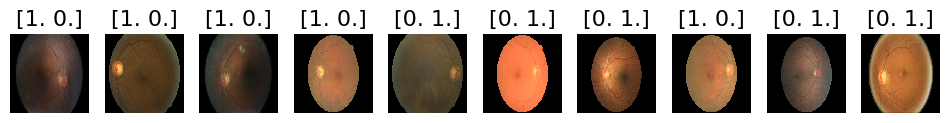

In [10]:
plots(imgs, titles=labels)

In [11]:
vgg16_model = keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 21s 0us/step


In [12]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

<ipython-input-18-456c8000e1f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batches, steps_per_epoch=4,


Epoch 1/5
4/4 - 82s - loss: 1.0716 - accuracy: 0.5500 - val_loss: 0.8026 - val_accuracy: 0.5750 - 82s/epoch - 20s/step
Epoch 2/5
4/4 - 71s - loss: 0.6958 - accuracy: 0.6000 - val_loss: 1.0182 - val_accuracy: 0.4750 - 71s/epoch - 18s/step
Epoch 3/5
4/4 - 70s - loss: 0.5701 - accuracy: 0.6250 - val_loss: 1.0536 - val_accuracy: 0.4750 - 70s/epoch - 18s/step
Epoch 4/5
4/4 - 71s - loss: 0.3785 - accuracy: 0.8250 - val_loss: 1.0965 - val_accuracy: 0.5250 - 71s/epoch - 18s/step
Epoch 5/5
4/4 - 70s - loss: 0.2897 - accuracy: 0.8500 - val_loss: 1.4193 - val_accuracy: 0.5500 - 70s/epoch - 18s/step


In [19]:
model.save('/content/drive/MyDrive/RETINOPATHY MODEL/diabetic_retinopathy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
